In [4]:
# Jun Allard jun.allard@uci.edu
# Simulate a transcription factor diffusing inside the cytoplasm, searching
# for a nuclear pore complex

# numerical parameters
dt = 0.001  # s
ntmax = 1e6 

NSample = 2000  # number of samples

# model parameters
D = 10  #microns^2/second
L = 10  # microns
NPCSize = 0.1  # microns
NPCLocation = [-L/2 0] 
print(NPCLocation)
alpha = sqrt(2*D*dt) 
print(ntmax)
# data collection
tCapture = zeros(NSample,1) ;


[-5.0 0.0]1.0e6

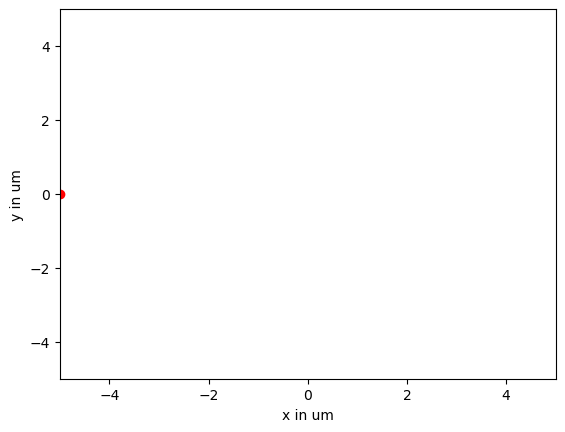

In [5]:
using PyPlot
# set up figure
figure(1)  
#clf  
#hold on  
PyPlot.clf()
#box on 
#set(gca,'xlim', [-L/2,L/2],'ylim',[-L/2,L/2]) 
plt.plot(NPCLocation[1], NPCLocation[2], "o", color = "red")#,'or','markerfacecolor','r','markersize',10) 
xlabel("x in um")  
ylabel("y in um")
xlim([-L/2, L/2])
ylim([-L/2, L/2]);

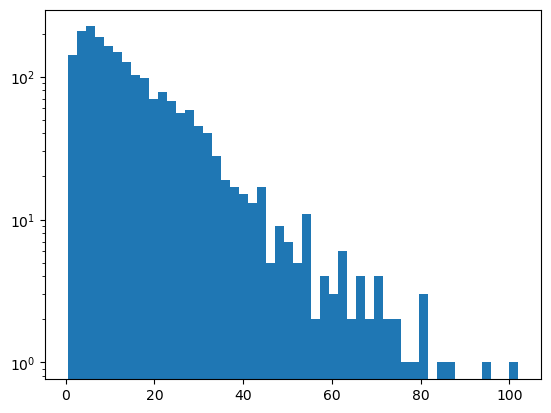

 26.807022 seconds (777.75 M allocations: 19.018 GiB, 7.39% gc time)


In [15]:

## Simulate!
@time begin
#tic;

#parfor iSample=1:NSample
for iSample in 1:NSample
    
    # intial condition
    x = [L/2 0];
    
    t = 0;
    for nt in 1:ntmax
        
        # dynamics
        x = x + alpha*randn(1,2);
        
        # boundaries
        if x[1]>L/2
            x[1]=L/2;
        elseif x[1]<-L/2
            x[1]=-L/2;
        end
        
        if x[2]>L/2
            x[2]=L/2;
        elseif x[2]<-L/2
            x[2]=-L/2;
        end
        
        # test for NPC capture
        if ( (x[1]-NPCLocation[1])^2 + (x[2]-NPCLocation[2])^2 < NPCSize^2 )
            tCapture[iSample] = t;
            break;
        end
        
        if 0 > 1 # visualize
            figure(1);
            plt.plot(x[1],x[2],"-ob");
            #drawnow;
        end # finished visualization
        
        t = t+dt;
        
    end # finished loop through time
        
end # finished loop through samples

#toc # report the time

## analyze results

figure(2); 
PyPlot.clf()
#hold on; 
#box on;
plt.hist(tCapture,50)
yscale("log")
#set(gca,"yscale","log");
end